## Jupyter часть

#### Подготовка данных

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'colab'


In [7]:
train_df = pd.read_csv('titanic_train.csv')
test_df = pd.read_csv('titanic_test.csv')

df = pd.concat([train_df, test_df], ignore_index=True, sort=False)

df['survived'] = df['survived'].astype('category')
df['pclass'] = df['pclass'].astype('category')
df['sex'] = df['sex'].astype('category')

df


,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1.0
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0.0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0.0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1.0
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1194,3,"Sdycoff, Mr. Todor",male,NaN,0,0,349222,7.8958,NaN,S,NaN,NaN,NaN,NaN
1305,403,2,"Eitemiller, Mr. George Floyd",male,23.0,0,0,29751,13.0000,NaN,S,NaN,NaN,"England / Detroit, MI",NaN
1306,108,1,"Fleming, Miss. Margaret",female,NaN,0,0,17421,110.8833,NaN,C,4,NaN,NaN,NaN
1307,510,2,"Mudd, Mr. Thomas Charles",male,16.0,0,0,S.O./P.P. 3,10.5000,NaN,S,NaN,NaN,"Halesworth, England",NaN


##### concat() заполняет отсутствующие данные NaN

#### Анализ таблицы
##### В каком классе было больше всего пассажиров?

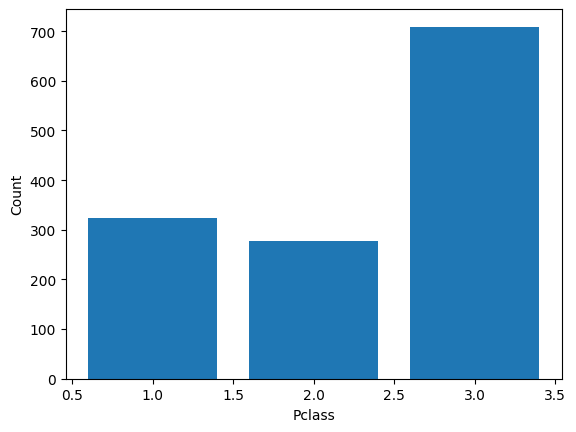

In [8]:
classes = df['pclass'].value_counts()

plt.bar(classes.index, classes.values)
plt.xlabel('Pclass')
plt.ylabel('Count')

plt.show()

In [9]:
classes=df['pclass'].value_counts()
classes

pclass
3    709
1    323
2    277
Name: count, dtype: int64

##### больше всего было пассажиров 3 класса

##### Группировать таблицу в два уровня: класс и пол, по среднему значению возраста. Кто из возможных комбинаций самый юный, кто самый взрослый? Насколько отличаются эти значения?

In [10]:
group_age = df.groupby(['pclass', 'sex'], observed=True)['age'].mean()
group_age

pclass  sex   
1       female    37.037594
        male      41.029250
2       female    27.499191
        male      30.815401
3       female    22.185307
        male      25.962273
Name: age, dtype: float64

 ##### самый юный -  женщина 3 класса, самый взрослый -  мужчина 1 класса

In [11]:
youngest_group = group_age.idxmin()
youngest_age = group_age.min()

oldest_group = group_age.idxmax()
oldest_age = group_age.max()

difference = oldest_age - youngest_age

difference


np.float64(18.843942432032065)

##### отличаются на 18,84

##### Отобрать только выживших пассажиров с фамилией, начинающейся на “K”. Отсортировать их по убыванию стоимости билета. Кто заплатил больше всех? Кто меньше всех?

In [12]:
survived_k = df[(df['survived'] == 1) & (df['name'].str.startswith('K', na=False))]

max_fare = survived_k['fare'].max()
richest = survived_k[survived_k['fare'] == max_fare]

min_fare = survived_k['fare'].min()
poorest = survived_k[survived_k['fare'] == min_fare]
print(richest[['name', 'fare']])
print(poorest[['name', 'fare']])


                       name      fare
171  Kreuchen, Miss. Emilie  211.3375
                      name    fare
800  Krekorian, Mr. Neshan  7.2292


##### Kreuchen, Miss. Emilie - заплатила больше всех, Krekorian, Mr. Neshan -заплатил меньше всех

##### Какое максимальное количество родных было с выжившим пассажиром?

In [13]:
df['relatives'] = df['sibsp'] + df['parch']

max_relatives = df[df['survived'] == 1]['relatives'].max()
max_relatives

np.int64(6)

##### 6 человек

##### Визуализация

##### 3D Scatter Plot

In [14]:

titanic_data = df.dropna(subset=['age', 'fare', 'pclass', 'survived', 'sex'])

fig = px.scatter_3d(
    titanic_data,
    x='age',
    y='fare',
    z='pclass',
    color='survived',
    symbol='sex',
    hover_data=['name'],
    title='3D Scatter: Age vs Fare vs Passenger Class'
)

fig.show()


#####  показывает взаимосвязь между возрастом пассажиров и стоимостью билета в зависимости от выживания

##### Linear Plot with Several Lines

In [ ]:
avg_fare = df.groupby(['age', 'sex', 'pclass'], observed=True)['fare'].mean().reset_index()

fig = px.line(
    avg_fare,
    x='age',
    y='fare',
    color='sex',
    line_dash='pclass',
    title='Average Fare by Age, Sex and Class'
)
fig.show()


##### график показывает как средняя стоимость билета меняется с возрастом, различия между полами и классами

##### Histogram

In [16]:
import plotly.express as px
fig = px.histogram(df, x='age', nbins=30, title='Passenger Age Distribution', marginal='box')
fig.show()


#####  показывает распределение пассажиров по возрастам

##### Bar Chart

In [17]:
pclass_counts = df['pclass'].value_counts().reset_index()
pclass_counts.columns = ['pclass', 'count']  

fig = px.bar(
    pclass_counts,
    x='pclass',
    y='count',
    title='Number of Passengers per Class',
    text='count', 
    labels={'pclass':'Passenger Class','count':'Count'}
)
fig.show()


#####  показывает количество пассажиров в каждом классе

##### Horizontal Bar Chart

In [18]:
sex_counts = df['sex'].value_counts().reset_index()
sex_counts.columns = ['sex', 'count'] 

fig = px.bar(
    sex_counts,
    x='count',
    y='sex',
    orientation='h',
    title='Number of Passengers by Sex',
    text='count' 
)
fig.show()


#####  показывает количество мужчин и женщин

##### Pie Chart

In [19]:
fig = px.pie(df, names='survived', title='Survival Proportion')
fig.show()


#####  показывает долю выживших и погибших

##### Box Chart

In [20]:
fig = px.box(df, x='pclass', y='fare', color='pclass', title='Fare Distribution by Class')
fig.show()


#####  показывает распределение стоимости билетов по классам

##### Sunburst Chart

In [21]:
fig = px.sunburst(
    df.dropna(subset=['pclass', 'sex', 'survived']),
    path=['pclass', 'sex', 'survived'],
    title='Sunburst Chart: Passenger Distribution by Class, Sex and Survival'
)
fig.show()

#####  показывает доли пассажиров в каждой группе

##### Scatter Plot

In [ ]:
fig = px.scatter(
    df.dropna(subset=['fare', 'sibsp', 'parch']),
    x='fare',
    y='sibsp', 
    color='pclass',
    size='parch', 
    hover_data=['age', 'sex', 'survived'],
    title='Ticket Fare vs Number of Siblings/Spouses',
    labels={'fare': 'Ticket Fare', 'sibsp': 'Number of Siblings/Spouses', 'parch': 'Parents/Children'}
)
fig.show()

#####  показывает связь стоимости билета и размера семьи

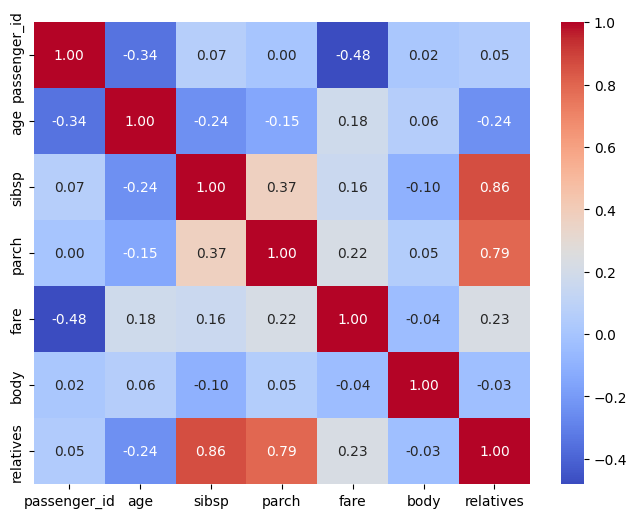

In [23]:
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


##### показывает какие признаки влияют друг на друга и на выживание

In [24]:
import plotly.graph_objects as go
sankey_data = df.groupby(['embarked', 'pclass', 'survived'], observed=False).size().reset_index(name='count')

labels = [
    'Cherbourg', 'Queenstown', 'Southampton',  
    '1st Class', '2nd Class', '3rd Class',     
    'Survived', 'Died'                         
]

sources = []
targets = [] 
values = []

for _, row in sankey_data.iterrows():
    embarked_idx = ['C', 'Q', 'S'].index(row['embarked'])
    pclass_idx = 3 + row['pclass'] - 1
    survived_idx = 6 + (0 if row['survived'] == 1 else 1)
    
    sources.append(embarked_idx)
    targets.append(pclass_idx)
    values.append(row['count'])
    
    sources.append(pclass_idx) 
    targets.append(survived_idx)
    values.append(row['count'])

fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels
    ),
    link=dict(
        source=sources,
        target=targets, 
        value=values,
        color='rgba(100, 149, 237, 0.4)'
    )
))

fig.update_layout(title_text="Passenger Flow: Embarkation Port → Class → Survival", font_size=10)
fig.show()

##### показывает поток пассажиров от порта посадки к классу и исходу